In [1]:
import numpy as np
import pandas as pd

from nltk.corpus import names
import nltk; nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.append('–ø—Ä–∏–≤–µ—Ç')
russian_stopwords.append('—Å–ø–∞—Å–∏–±–æ')
russian_stopwords.append('–ø–æ–∂–∞–ª—É–π—Å—Ç–∞')
russian_stopwords.append('–ø–æ–∫–∞')
russian_stopwords.append('–¥–æ–±—Ä—ã–π')
russian_stopwords.append('–¥–µ–Ω—å')
russian_stopwords.append('nan')
russian_stopwords.append('end')
russian_stopwords.append('—É—Ç—Ä–æ')

from pandas import DataFrame, Series
from pymorphy2 import MorphAnalyzer

from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sych_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Assign spreadsheet filename to `file`
file = '–í—Å–µ –≥–ª–æ–±–∞–ª—ã –∑–∞ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏–µ –ß–ë.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

In [40]:
# Print the sheet names
sheet_names_list = xl.sheet_names
df = None

for i in range(len(sheet_names_list)):
    # Load a sheet into a DataFrame by name: df1
    print(f'sheet_names_list={sheet_names_list[i]}')
    df_current = xl.parse(sheet_names_list[i])
    df_current = df_current.loc[:,['id','mesTExt','type','dialogid', 'Mdate','AgentEmail']]
    df_current = df_current.drop_duplicates()
    #df.head()

    df_current['Mdate'] = pd.to_datetime(df_current['Mdate'],format='%Y-%m-%d')
    df_current['Mdate'] = df_current['Mdate'].dt.date

    df_filter = df_current['type'].isin([1])
    df1 = df_current[df_filter]

    a = df1.groupby(['dialogid', 'Mdate'])['mesTExt'].transform(lambda answer : " ".join(str(x) for x in answer))
    df12= a.to_frame()

    df4 = pd.concat([df12, df1.loc[:,['dialogid','Mdate']]], axis=1)
    df4 = df4.drop_duplicates()

    df_filter = df_current['type'].isin([2])
    df5 = df_current[df_filter]
    df5 = df5.loc[:,['dialogid', 'Mdate','AgentEmail']]
    df5 = df5.drop_duplicates()

    df_req=pd.merge(df4, df5, on=['dialogid', 'Mdate'], how='inner')
    if i>0:
        df = pd.concat([df,df_req], axis=0, ignore_index=True, sort=False)
    else:
        df = df_req
    
df.to_csv("–ó–∞—è–≤–∫–∏ –≤ —á–∞—Ç–±–æ—Ç.csv", encoding = 'utf-16', sep=";", index=False)   


sheet_names_list=–º–∞–π 18
sheet_names_list=–ò—é–Ω—å 18
sheet_names_list=–ò—é–ª—å 18
sheet_names_list=–ê–≤–≥ 18
sheet_names_list=–°–µ–Ω—Ç 18
sheet_names_list=–û–∫—Ç 18
sheet_names_list=–ù–æ—è 18
sheet_names_list=–î–µ–∫ 18
sheet_names_list=–Ø–Ω–≤ 19
sheet_names_list=–§–µ–≤ 19
sheet_names_list=–ú–∞—Ä—Ç 19
sheet_names_list=–ê–ø—Ä 19
sheet_names_list=–ú–∞–π 19
sheet_names_list=–ò—é–Ω—å 19
sheet_names_list=–ò—é–ª—å 19
sheet_names_list=–ê–≤–≥ 19
sheet_names_list=–°–µ–Ω 19
sheet_names_list=–û–∫—Ç 19
sheet_names_list=–ù–æ—è 19
sheet_names_list=–î–µ–∫ 19
sheet_names_list=–Ø–Ω–≤ 20
sheet_names_list=–§–µ–≤ 20
sheet_names_list=–ú–∞—Ä—Ç 20
sheet_names_list=–ê–ø—Ä 20


In [48]:
import re

deleted_symols = '[\\\\\'[\]!"$%&()*+,-./:;<=>?@^_`{|}~¬´¬ª\n]'
func = lambda text : re.sub(deleted_symols, ' ', text)
df["without_punctuation_text"] = df["mesTExt"].apply(func)
df.head()

mesTExt  dialogid       Mdate  \
0  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ 1 End –ü—Ä–∏–≤–µ—Ç 1 11 EN...   2792225  2018-05-19   
1  –Ø —Ç—É—Ç 1 11 12 –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫...   2792602  2018-05-19   
2  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...   2792215  2018-05-21   
3  –ï—Ä–ø –ï—Ä–ø 2 –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç ? ...   2792602  2018-05-21   
4  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...   2792225  2018-05-21   

                AgentEmail                           without_punctuation_text  
0  Oksenich.a@dv-nevada.ru  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ 1 End –ü—Ä–∏–≤–µ—Ç 1 11 EN...  
1  Oksenich.a@dv-nevada.ru  –Ø —Ç—É—Ç 1 11 12 –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫...  
2  Oksenich.a@dv-nevada.ru  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...  
3  Oksenich.a@dv-nevada.ru  –ï—Ä–ø –ï—Ä–ø 2 –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   ...  
4  Oksenich.a@dv-nevada.ru  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...

In [2]:
df = pd.read_csv('–ó–∞—è–≤–∫–∏ –≤ —á–∞—Ç–±–æ—Ç.csv', encoding = 'utf-16', sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35758 entries, 0 to 35757
Data columns (total 4 columns):
dialogid                    35758 non-null int64
Mdate                       35758 non-null object
AgentEmail                  35758 non-null object
without_punctuation_text    35683 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

dialogid       Mdate               AgentEmail  \
0   2792225  2018-05-19  Oksenich.a@dv-nevada.ru   
1   2792602  2018-05-19  Oksenich.a@dv-nevada.ru   
2   2792215  2018-05-21  Oksenich.a@dv-nevada.ru   
3   2792602  2018-05-21  Oksenich.a@dv-nevada.ru   
4   2792225  2018-05-21  Oksenich.a@dv-nevada.ru   

                            without_punctuation_text  
0  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ 1 End –ü—Ä–∏–≤–µ—Ç 1 11 EN...  
1  –Ø —Ç—É—Ç 1 11 12 –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫...  
2  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...  
3  –ï—Ä–ø –ï—Ä–ø 2 –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   ...  
4  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...

In [49]:
df1 = df.drop(["mesTExt"], axis=1)
df1.to_csv("–ó–∞—è–≤–∫–∏ –≤ —á–∞—Ç–±–æ—Ç (–±–µ–∑ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏).csv", encoding = 'utf-16', sep=";", index=False) 

In [5]:
df = pd.read_csv('–ó–∞—è–≤–∫–∏ –≤ —á–∞—Ç–±–æ—Ç (–±–µ–∑ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏).csv', encoding = 'utf-16', sep=";")  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35758 entries, 0 to 35757
Data columns (total 4 columns):
dialogid                    35758 non-null int64
Mdate                       35758 non-null object
AgentEmail                  35758 non-null object
without_punctuation_text    35683 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [5]:
func = lambda text : ' '.join([elem for elem in str(text).split(' ') if elem.isdigit() == False])   
df['without_numbers_text'] = df["without_punctuation_text"].apply(func)
df.head()

dialogid       Mdate               AgentEmail  \
0   2792225  2018-05-19  Oksenich.a@dv-nevada.ru   
1   2792602  2018-05-19  Oksenich.a@dv-nevada.ru   
2   2792215  2018-05-21  Oksenich.a@dv-nevada.ru   
3   2792602  2018-05-21  Oksenich.a@dv-nevada.ru   
4   2792225  2018-05-21  Oksenich.a@dv-nevada.ru   

                            without_punctuation_text  \
0  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ 1 End –ü—Ä–∏–≤–µ—Ç 1 11 EN...   
1  –Ø —Ç—É—Ç 1 11 12 –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫...   
2  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...   
3  –ï—Ä–ø –ï—Ä–ø 2 –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   ...   
4  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...   

                                without_numbers_text  
0  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ End –ü—Ä–∏–≤–µ—Ç END –ü–†–∏–≤–µ...  
1  –Ø —Ç—É—Ç –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å...  
2  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...  
3  –ï—Ä–ø –ï—Ä–ø –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   –ó–∞...  
4  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...

In [6]:
df["tokenized_text"] = df['without_numbers_text']
df = df.drop(["without_numbers_text", "without_punctuation_text"], axis=1)
df.head()

dialogid       Mdate               AgentEmail  \
0   2792225  2018-05-19  Oksenich.a@dv-nevada.ru   
1   2792602  2018-05-19  Oksenich.a@dv-nevada.ru   
2   2792215  2018-05-21  Oksenich.a@dv-nevada.ru   
3   2792602  2018-05-21  Oksenich.a@dv-nevada.ru   
4   2792225  2018-05-21  Oksenich.a@dv-nevada.ru   

                                      tokenized_text  
0  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ End –ü—Ä–∏–≤–µ—Ç END –ü–†–∏–≤–µ...  
1  –Ø —Ç—É—Ç –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å...  
2  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...  
3  –ï—Ä–ø –ï—Ä–ø –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   –ó–∞...  
4  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...

In [7]:
n_words = len(set(" ".join(df["tokenized_text"]).split()))
n_words

44575

In [8]:
df["lowercase_text"] = df["tokenized_text"].apply(lambda text : text.lower())
df.head()

dialogid       Mdate               AgentEmail  \
0   2792225  2018-05-19  Oksenich.a@dv-nevada.ru   
1   2792602  2018-05-19  Oksenich.a@dv-nevada.ru   
2   2792215  2018-05-21  Oksenich.a@dv-nevada.ru   
3   2792602  2018-05-21  Oksenich.a@dv-nevada.ru   
4   2792225  2018-05-21  Oksenich.a@dv-nevada.ru   

                                      tokenized_text  \
0  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ End –ü—Ä–∏–≤–µ—Ç END –ü–†–∏–≤–µ...   
1  –Ø —Ç—É—Ç –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å...   
2  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...   
3  –ï—Ä–ø –ï—Ä–ø –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   –ó–∞...   
4  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...   

                                      lowercase_text  
0  –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø–æ–∫–∞ end –ø—Ä–∏–≤–µ—Ç end –ø—Ä–∏–≤–µ...  
1  —è —Ç—É—Ç —Å–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ —Å–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å...  
2  –ø—Ä–∏–≤–µ—Ç –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø —Å–ø–∞—Å–∏–±–æ...  
3  –µ—Ä–ø –µ—Ä–ø –µ—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   –∑–∞...  
4  –≤–∏—Å–∏—Ç –µ—Ä–ø –≤–∏—Å–∏—Ç –µ—Ä–ø end –≤–µ—Å–∏—Ç erp end –≤–∏—Å–∏—Ç –ø—Ä...

In [12]:
!pip install pymorphy2

In [9]:
df["lemmatized_text"] = df["lowercase_text"]

In [10]:
def to_lemmatize2(df):
    all_word_str = " ".join(df["lowercase_text"])
    all_word_list = all_word_str.split()
    all_unique_word = Series(all_word_list).unique()
    lemmatized_word_dict = {}
    lemmatizer = MorphAnalyzer()
    for word in all_unique_word:
        lemmatized_word_dict[word] = lemmatizer.normal_forms(word)[0]
    lemm_func = lambda text: ' '.join([lemmatized_word_dict[word] for word in text.split()])
    df['lemmatized_text'] = df['lowercase_text'].apply(lemm_func)
    return df, all_unique_word

In [11]:
%%time
df, _ = to_lemmatize2(df)

Wall time: 13.5 s


In [12]:
df.head()

dialogid       Mdate               AgentEmail  \
0   2792225  2018-05-19  Oksenich.a@dv-nevada.ru   
1   2792602  2018-05-19  Oksenich.a@dv-nevada.ru   
2   2792215  2018-05-21  Oksenich.a@dv-nevada.ru   
3   2792602  2018-05-21  Oksenich.a@dv-nevada.ru   
4   2792225  2018-05-21  Oksenich.a@dv-nevada.ru   

                                      tokenized_text  \
0  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ End –ü—Ä–∏–≤–µ—Ç END –ü–†–∏–≤–µ...   
1  –Ø —Ç—É—Ç –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å...   
2  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...   
3  –ï—Ä–ø –ï—Ä–ø –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   –ó–∞...   
4  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...   

                                      lowercase_text  \
0  –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø–æ–∫–∞ end –ø—Ä–∏–≤–µ—Ç end –ø—Ä–∏–≤–µ...   
1  —è —Ç—É—Ç —Å–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ —Å–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å...   
2  –ø—Ä–∏–≤–µ—Ç –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø —Å–ø–∞—Å–∏–±–æ...   
3  –µ—Ä–ø –µ—Ä–ø –µ—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   –∑–∞...   
4  –≤–∏—Å–∏—Ç –µ—Ä–ø –≤–∏—Å–∏—Ç –µ—Ä–ø end –≤–µ—Å–∏—Ç erp end –≤–∏—Å–∏—Ç –ø—Ä...   

                                     lemmatized_text  
0  –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø–æ–∫–∞ end –ø—Ä–∏–≤–µ—Ç end –ø—Ä–∏–≤–µ...  
1  —è —Ç—É—Ç —Å–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ—á—å —Å–ª–æ–º–∞—Ç—å –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤...  
2  –ø—Ä–∏–≤–µ—Ç –Ω–µ —Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø –Ω–µ —Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø —Å–ø–∞—Å–∏–±–æ...  
3  –µ—Ä–ø –µ—Ä–ø –µ—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á—å –±—ã—Ç—å –∏–ª–∏ –Ω–µ—Ç –∑–∞–≤–∏—Å–Ω...  
4  –≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–∏—Å–µ—Ç—å –µ—Ä–ø end –≤–µ—Å–∏—Ç—å erp end –≤–∏—Å–µ—Ç...

In [13]:
func = lambda text : ' '.join([elem for elem in str(text).split(' ') if elem not in russian_stopwords])   
df['lemmatized_text_del_stop_words'] = df["lemmatized_text"].apply(func)
df.head()

dialogid       Mdate               AgentEmail  \
0   2792225  2018-05-19  Oksenich.a@dv-nevada.ru   
1   2792602  2018-05-19  Oksenich.a@dv-nevada.ru   
2   2792215  2018-05-21  Oksenich.a@dv-nevada.ru   
3   2792602  2018-05-21  Oksenich.a@dv-nevada.ru   
4   2792225  2018-05-21  Oksenich.a@dv-nevada.ru   

                                      tokenized_text  \
0  –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü—Ä–∏–≤–µ—Ç –ü–æ–∫–∞ End –ü—Ä–∏–≤–µ—Ç END –ü–†–∏–≤–µ...   
1  –Ø —Ç—É—Ç –°–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ –°–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å...   
2  –ü—Ä–∏–≤–µ—Ç –ù–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –ù–ï —Ä–∞–±–æ—Ç–∞–µ—Ç –ï–†–ü –°–ø–∞—Å–∏–±–æ...   
3  –ï—Ä–ø –ï—Ä–ø –ï—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   –ó–∞...   
4  –í–∏—Å–∏—Ç –ï–†–ü –í–∏—Å–∏—Ç –ï–†–ü END –í–µ—Å–∏—Ç ERP End –í–∏—Å–∏—Ç –ø—Ä...   

                                      lowercase_text  \
0  –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø–æ–∫–∞ end –ø—Ä–∏–≤–µ—Ç end –ø—Ä–∏–≤–µ...   
1  —è —Ç—É—Ç —Å–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ–∫ —Å–ª–æ–º–∞–Ω –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å...   
2  –ø—Ä–∏–≤–µ—Ç –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –µ—Ä–ø —Å–ø–∞—Å–∏–±–æ...   
3  –µ—Ä–ø –µ—Ä–ø –µ—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á–∏ –±—É–¥–µ—Ç–µ –∏–ª–∏ –Ω–µ—Ç   –∑–∞...   
4  –≤–∏—Å–∏—Ç –µ—Ä–ø –≤–∏—Å–∏—Ç –µ—Ä–ø end –≤–µ—Å–∏—Ç erp end –≤–∏—Å–∏—Ç –ø—Ä...   

                                     lemmatized_text  \
0  –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø—Ä–∏–≤–µ—Ç –ø–æ–∫–∞ end –ø—Ä–∏–≤–µ—Ç end –ø—Ä–∏–≤–µ...   
1  —è —Ç—É—Ç —Å–æ–∫ –¥–æ–±—Ä—ã–π –ø—Ä–æ—Ç–µ—á—å —Å–ª–æ–º–∞—Ç—å –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤...   
2  –ø—Ä–∏–≤–µ—Ç –Ω–µ —Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø –Ω–µ —Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø —Å–ø–∞—Å–∏–±–æ...   
3  –µ—Ä–ø –µ—Ä–ø –µ—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á—å –±—ã—Ç—å –∏–ª–∏ –Ω–µ—Ç –∑–∞–≤–∏—Å–Ω...   
4  –≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–∏—Å–µ—Ç—å –µ—Ä–ø end –≤–µ—Å–∏—Ç—å erp end –≤–∏—Å–µ—Ç...   

                      lemmatized_text_del_stop_words  
0  —Å–ª–æ–º–∞—Ç—å—Å—è –Ω–æ–≥–æ—Ç—å —Å–ª–æ–º–∞—Ç—å –Ω–æ–≥–æ—Ç—å —Å–ª–æ–º–∞—Ç—å –Ω–æ–≥–æ—Ç—å...  
1  —Å–æ–∫ –ø—Ä–æ—Ç–µ—á—å —Å–ª–æ–º–∞—Ç—å –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–∏—Å...  
2       —Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø —Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø –µ—Ä–ø —É–ø–∞—Å—Ç—å –Ω–∞–ø—Ä–æ—á—å  
3  –µ—Ä–ø –µ—Ä–ø –µ—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á—å –∑–∞–≤–∏—Å–Ω—É—Ç—å –µ—Ä–ø –∑–∞–≥—Ä—É...  
4  –≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–µ—Å–∏—Ç—å erp –≤–∏—Å–µ—Ç—å –ø—Ä–æ–≥—Ä–∞...

LDA: –∫–æ–ª–ª–µ–∫—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ –≤ –≤–∏–¥–µ —Å–ø–∏—Å–∫–∞ —Å–ø–∏—Å–∫–æ–≤, –∫–∞–∂–¥—ã–π –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–π —Å–ø–∏—Å–æ–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ—Ç–¥–µ–ª—å–Ω–æ–º—É –¥–æ–∫—É–º–µ–Ω—Ç—É –∏ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –µ–≥–æ —Å–ª–æ–≤. –ü—Ä–∏–º–µ—Ä –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –∏–∑ –¥–≤—É—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤: 

[["hello", "world"], ["programming", "in", "python"]]

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –≤ —Ç–∞–∫–æ–π —Ñ–æ—Ä–º–∞—Ç, –∞ –∑–∞—Ç–µ–º —Å–æ–∑–¥–∞–¥–∏–º –æ–±—ä–µ–∫—Ç—ã corpus –∏ dictionary, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –±—É–¥–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –º–æ–¥–µ–ª—å.

In [14]:
lst = df['lemmatized_text_del_stop_words'].tolist()
lst

['—Å–ª–æ–º–∞—Ç—å—Å—è –Ω–æ–≥–æ—Ç—å —Å–ª–æ–º–∞—Ç—å –Ω–æ–≥–æ—Ç—å —Å–ª–æ–º–∞—Ç—å –Ω–æ–≥–æ—Ç—å —Å–ª–æ–º–∞—Ç—å—Å—è –Ω–æ—É—Ç–±—É–∫ –≤–µ—Å—å –ø—Ä–æ–ø–∞—Å—Ç—å –¥–µ–ª–∞—Ç—å –≤–æ–æ–±—â–µ —á—É—à—å –ø–æ–º–æ—á—å —Å—Ä–æ—á–Ω–æ –≤–æ–æ–±—â–µ —á—É—à—å –ø–æ–º–æ—á—å —Å—Ä–æ—á–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø –∞–≤—Ç–æ–∑–∞–∫–∞–∑ —Å–æ–∫ –ø—Ä–æ—Ç–µ—á—å —Å–æ–∫ –ø—Ä–æ—Ç–µ—á—å',
 '—Å–æ–∫ –ø—Ä–æ—Ç–µ—á—å —Å–ª–æ–º–∞—Ç—å –Ω–æ—É—Ç–±—É–∫ –µ—Ä–ø –≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–∏—Å–µ—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä –¥–æ–±–∞–≤–∏—Ç—å –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω –ª–∏—á–Ω—ã–π –∫–∞–±–∏–Ω–µ—Ç –ø–∞—Ä–ª—å',
 '—Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø —Ä–∞–±–æ—Ç–∞—Ç—å –µ—Ä–ø –µ—Ä–ø —É–ø–∞—Å—Ç—å –Ω–∞–ø—Ä–æ—á—å',
 '–µ—Ä–ø –µ—Ä–ø –µ—Ä–ø —á–∏–Ω–∏—Ç—å —Å–≤–æ–ª–æ—á—å –∑–∞–≤–∏—Å–Ω—É—Ç—å –µ—Ä–ø –∑–∞–≥—Ä—É–∂–∞—Ç—å—Å—è –∑–∞–∫–∞–∑ –ø—Ä–æ–≤–æ–¥–∏—Ç—å—Å—è —ç—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –∫–∞–∂–¥—ã–π –¥–µ–ª–∞—Ç—å',
 '–≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–∏—Å–µ—Ç—å –µ—Ä–ø –≤–µ—Å–∏—Ç—å erp –≤–∏—Å–µ—Ç—å –ø—Ä–æ–≥—Ä–∞–º –µ—Ä–ø –∑–∞–≥—Ä—É–∂–∞—Ç—å—Å—è –∑–∞–∫–∞–∑ –∑–∞–∫–∞–∑ –ø—Ä–æ–≤–æ–¥–∏—Ç—

In [15]:
texts = []
for i in range(len(lst)):    
    texts.append(lst[i].split(' '))

In [16]:
dictionary = corpora.Dictionary(texts)   # —Å–æ—Å—Ç–∞–≤–ª—è–µ–º —Å–ª–æ–≤–∞—Ä—å
corpus = [dictionary.doc2bow(text) for text in texts]  # —Å–æ—Å—Ç–∞–≤–ª—è–µ–º –∫–æ—Ä–ø—É—Å –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤

In [18]:
len(corpus)

35758

In [19]:
dictionary.token2id

{'–∞–≤—Ç–æ–∑–∞–∫–∞–∑': 0,
 '–≤–µ—Å—å': 1,
 '–≤–æ–æ–±—â–µ': 2,
 '–¥–µ–ª–∞—Ç—å': 3,
 '–µ—Ä–ø': 4,
 '–Ω–æ–≥–æ—Ç—å': 5,
 '–Ω–æ—É—Ç–±—É–∫': 6,
 '–ø–æ–º–æ—á—å': 7,
 '–ø—Ä–æ–ø–∞—Å—Ç—å': 8,
 '–ø—Ä–æ—Ç–µ—á—å': 9,
 '—Ä–∞–±–æ—Ç–∞—Ç—å': 10,
 '—Å–ª–æ–º–∞—Ç—å': 11,
 '—Å–ª–æ–º–∞—Ç—å—Å—è': 12,
 '—Å–æ–∫': 13,
 '—Å—Ä–æ—á–Ω–æ': 14,
 '—á—É—à—å': 15,
 '–≤–∏—Å–µ—Ç—å': 16,
 '–¥–æ–±–∞–≤–∏—Ç—å': 17,
 '–∫–∞–±–∏–Ω–µ—Ç': 18,
 '–ª–∏—á–Ω—ã–π': 19,
 '–Ω–æ–º–µ—Ä': 20,
 '–æ–ø–µ—Ä–∞—Ç–æ—Ä': 21,
 '–ø–∞—Ä–ª—å': 22,
 '—Ç–µ–ª–µ—Ñ–æ–Ω': 23,
 '–Ω–∞–ø—Ä–æ—á—å': 24,
 '—É–ø–∞—Å—Ç—å': 25,
 '–∑–∞–≤–∏—Å–Ω—É—Ç—å': 26,
 '–∑–∞–≥—Ä—É–∂–∞—Ç—å—Å—è': 27,
 '–∑–∞–∫–∞–∑': 28,
 '–∫–∞–∂–¥—ã–π': 29,
 '–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å': 30,
 '–ø—Ä–æ–≤–æ–¥–∏—Ç—å—Å—è': 31,
 '—Å–≤–æ–ª–æ—á—å': 32,
 '—á–∏–Ω–∏—Ç—å': 33,
 '—ç—Ç–æ': 34,
 'erp': 35,
 '–≤–µ—Å–∏—Ç—å': 36,
 '–¥–æ–∫—É–º–µ–Ω—Ç': 37,
 '–µ–∫–ª–º–Ω–∞': 38,
 '–µ—à–∫–∞': 39,
 '–∫–ª–∏–µ–Ω—Ç': 40,
 '–º–∞—Ç—Ä—ë—à–∫–∞': 41,
 '–ø—Ä–æ–≥—Ä–∞–º': 42,
 '–∑–∞—è–≤–∫–∞': 43,
 '–æ–∫': 44,
 '–ø—Ä–∏–ª–µ—Ç–∞—Ç—å': 45,
 

In [20]:
# –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª—å
np.random.seed(76543)
%time ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, passes=20, alpha=1.25, eta=1.25)

Wall time: 4min 48s


In [23]:
coherencemodel = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherencemodel.get_coherence()

0.5390588860557639

In [93]:
# –≤—ã–≤–æ–¥–∏–º —Ç–æ–ø—ã —Å–ª–æ–≤
for t, top_words in ldamodel.print_topics(num_topics=20, num_words=10):
    print("Topic", t, ":", top_words)

Topic 0 : 0.022*"–≤" + 0.018*"–∑–∞—è–≤–∫–∞" + 0.014*"–¥–æ–≥–æ–≤–æ—Ä" + 0.012*"—è" + 0.011*"–ø–æ" + 0.011*"–±–æ—Ç" + 0.010*"–æ–æ–æ" + 0.010*"–∞" + 0.010*"–∏" + 0.009*"–≥–æ–¥"
Topic 1 : 0.014*"–∞—Ä00" + 0.013*"–Ω–µ–≤–∞–¥" + 0.008*"–≤–º—Å" + 0.008*"–æ—Ç–≥—Ä—É–∑–∫–∞" + 0.007*"–µ–≥–∞–∏—Å–∞" + 0.006*"–æ–∫—Ç–∞–≤" + 0.005*"–µ—Å—Ç—å" + 0.005*"–≥–æ—Ç–æ–≤—ã–π" + 0.004*"—à–º—Å" + 0.003*"–ø—Ä–æ—Å—Ç–∏—Ç—å"
Topic 2 : 0.072*"–∑–¥—Ä–∞–≤—Å—Ç–≤–æ–≤–∞—Ç—å" + 0.059*"—Ö–æ—Ä–æ—à–æ" + 0.055*"–æ–∫" + 0.026*"–ø–æ" + 0.025*"–∫–∞—Å—Å–∞" + 0.024*"–æ—Ç—á—ë—Ç" + 0.017*"–¥–∞" + 0.015*"—ç–Ω–∏–∫" + 0.012*"–ø—Ä–æ—Ö–æ–¥–∏—Ç—å" + 0.011*"–≤–µ—Å—å"
Topic 3 : 0.069*"–≤" + 0.055*"–∑–∞–∫–∞–∑" + 0.042*"–Ω–µ" + 0.032*"–Ω–∞" + 0.026*"–ø–æ—Å—Ç–∞–≤—â–∏–∫" + 0.020*"—Å" + 0.018*"—Ç–æ–≤–∞—Ä" + 0.015*"—Ü–µ–Ω–∞" + 0.014*"–ø–æ–∑–∏—Ü–∏—è" + 0.013*"–ø–æ"
Topic 4 : 0.047*"–Ω–µ" + 0.027*"—è" + 0.025*"—á—Ç–æ" + 0.025*"–∏" + 0.023*"–≤" + 0.020*"–Ω–∞" + 0.019*"—ç—Ç–æ" + 0.018*"–ø–æ" + 0.018*"–≤—ã" + 0.017*"–º–æ—á—å"
Topic 5 : 0.057*"–≤" + 0.042

In [24]:
import copy
dictionary2 = copy.deepcopy(dictionary)

In [25]:
lst = []
for (key, value) in dictionary2.dfs.items():
    if (value > 3000) or (value < 10):
        lst.append(key)

In [26]:
dictionary2.filter_tokens(lst)

In [27]:
dict_size_after = len(dictionary2)
dict_size_after

4582

In [28]:
dict_size_before = len(dictionary)
dict_size_before

22593

In [29]:
corpus2 = [dictionary2.doc2bow(text) for text in texts]  # —Å–æ—Å—Ç–∞–≤–ª—è–µ–º –∫–æ—Ä–ø—É—Å –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤

In [30]:
corpus_size_before = 0
for i in range(len(corpus)):
    corpus_size_before += len(corpus[i])
    
corpus_size_before

689323

In [31]:
corpus_size_after = 0
for i in range(len(corpus2)):
    corpus_size_after += len(corpus2[i])
    
corpus_size_after

535013

In [32]:
# –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª—å
np.random.seed(76543)
%time ldamodel2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=20, passes=20, alpha=1.25, eta=1.25)

Wall time: 3min 39s


In [33]:
coherencemodel2 = CoherenceModel(model=ldamodel2, texts=texts, dictionary=dictionary2, coherence='c_v')
coherencemodel2.get_coherence()

0.5522688117155123

In [37]:
def compute_coherence_values2(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    num_topics_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha=1.25, eta=1.25)
        num_topics_list.append(num_topics)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        c = coherencemodel.get_coherence()
        coherence_values.append(c)
        print(f'num_topics={num_topics}, coherence={c}')

    return num_topics_list, coherence_values

In [38]:
# Can take a long time to run.
num_topics_list, coherence_values = compute_coherence_values2(dictionary=dictionary2, corpus=corpus2, texts=texts, start=2, limit=20, step=2)

num_topics=2, coherence=0.5245059489154041
num_topics=4, coherence=0.5217261310699377
num_topics=6, coherence=0.5931457216915098
num_topics=8, coherence=0.617442067881158
num_topics=10, coherence=0.5579893704098159
num_topics=12, coherence=0.5897819269987613
num_topics=14, coherence=0.5848124349836892
num_topics=16, coherence=0.595402875267758
num_topics=18, coherence=0.5722591629164525


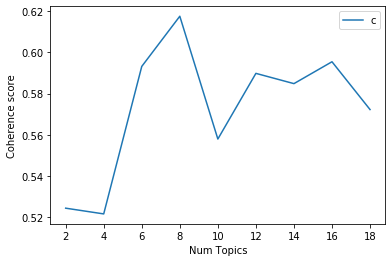

In [39]:
# Show graph
plt.plot(num_topics_list, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
# Can take a long time to run.
num_topics_list, coherence_values = compute_coherence_values2(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=20, step=2)

num_topics=2, coherence=0.5897126799542405
num_topics=4, coherence=0.5508730592310299
num_topics=6, coherence=0.596398897266277
num_topics=8, coherence=0.5444843069206828
num_topics=10, coherence=0.542017188984096
num_topics=12, coherence=0.548068197272595
num_topics=14, coherence=0.5456145959632753
num_topics=16, coherence=0.4943758512112838
num_topics=18, coherence=0.5457815645279404


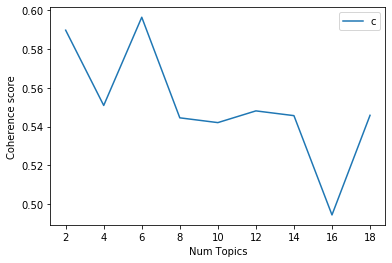

In [41]:
# Show graph
plt.plot(num_topics_list, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [42]:
# –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª—å
np.random.seed(76543)
%time ldamodel2 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=8, passes=20, alpha=1.25, eta=1.25)

Wall time: 4min 29s


In [43]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel2, corpus2, dictionary2)
vis

C:\Users\sych_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.178869  0.242909       1        1  16.478258
2      0.135418 -0.015722       2        1  13.949631
7      0.008194  0.017962       3        1  13.601690
3     -0.022921  0.155738       4        1  12.786386
4      0.096223 -0.083467       5        1  12.494384
6      0.102351  0.003897       6        1  12.162345
1      0.139396 -0.079366       7        1  11.227248
5     -0.279792 -0.241952       8        1   7.300056, topic_info=     Category         Freq          Term        Total  loglift  logprob
3445  Default  4183.000000          this  4183.000000  30.0000  30.0000
256   Default  3558.000000        –∑–∞–¥–∞—á–∞  3558.000000  29.0000  29.0000
1525  Default  3108.000000       –ø—Ä–∏–Ω—è—Ç—å  3108.000000  28.0000  28.0000
553   Default  2477.000000             a  2477.000000  27.0000  27.0000
2003  Default  2404.000000      whatsapp  2404.000000  26.0000  26.0000
1494  Default  2306.000000        system  2306.000000  25.0000  25.0000
1491  Default  2304.000000       message  2304.000000  24.0000  24.0000
923   Default  3352.000000        –ø–∞—Ä–æ–ª—å  3352.000000  23.0000  23.0000
3446  Default  2209.000000            to  2209.000000  22.0000  22.0000
212   Default  3264.000000     —É–¥–∞–ª—ë–Ω–Ω—ã–π  3264.000000  21.0000  21.0000
48    Default  2147.000000            is  2147.000000  20.0000  20.0000
2297  Default  2132.000000        client  2132.000000  19.0000  19.0000
1920  Default  2100.000000         start  2100.000000  18.0000  18.0000
3870  Default  2097.000000          with  2097.000000  17.0000  17.0000
3869  Default  2096.000000         which  2096.000000  16.0000  16.0000
3867  Default  2096.000000        allows  2096.000000  15.0000  15.0000
3868  Default  2096.000000          chat  2096.000000  14.0000  14.0000
696   Default  2964.000000  –ø–æ–¥–∫–ª—é—á–∏—Ç—å—Å—è  2964.000000  13.0000  13.0000
81    Default  2539.000000     –ø—Ä–æ–≥—Ä–∞–º–º–∞  2539.000000  12.0000  12.0000
524   Default  2863.000000       —Å–µ–≥–æ–¥–Ω—è  2863.000000  11.0000  11.0000
25    Default  3730.000000      –¥–æ–∫—É–º–µ–Ω—Ç  3730.000000  10.0000  10.0000
125   Default  2453.000000          —Ü–µ–Ω–∞  2453.000000   9.0000   9.0000
210   Default  2688.000000       —Ä–∞–±–æ—á–∏–π  2688.000000   8.0000   8.0000
262   Default  2562.000000     –∫–æ–º–ø—å—é—Ç–µ—Ä  2562.000000   7.0000   7.0000
867   Default  2243.000000           –∫–æ–¥  2243.000000   6.0000   6.0000
14    Default  2457.000000         –Ω–æ–º–µ—Ä  2457.000000   5.0000   5.0000
77    Default  3236.000000        –¥–æ—Å—Ç—É–ø  3236.000000   4.0000   4.0000
1344  Default  1867.000000            —Ä—Ü  1867.000000   3.0000   3.0000
485   Default  1808.000000           –æ–æ–æ  1808.000000   2.0000   2.0000
2599  Default  1659.000000            –ø–∑  1659.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
48     Topic8  2139.092773            is  2147.324707   2.6134  -3.1275
2297   Topic8  2124.194336        client  2132.427734   2.6134  -3.1344
1920   Topic8  2092.249512         start  2100.428711   2.6134  -3.1496
3870   Topic8  2089.169189          with  2097.336670   2.6134  -3.1511
3867   Topic8  2088.225098        allows  2096.391846   2.6134  -3.1515
3868   Topic8  2088.225098          chat  2096.391846   2.6134  -3.1515
3869   Topic8  2088.225098         which  2096.391846   2.6134  -3.1515
442    Topic8   577.471802                 586.696472   2.6014  -4.4369
112    Topic8   610.800781          —Ç–µ—Å—Ç   622.779968   2.5979  -4.3808
4183   Topic8   363.365906           pdf   376.368652   2.5821  -4.9002
575    Topic8   319.727356          mail   331.738495   2.5804  -5.0281
569    Topic8   157.077789          font   165.152374   2.5672  -5.7388
1489   Topic8   257.374451         error   270.624542   2.5671  -5.2451
1492   Topic8   208.687500       occured   220.626022   2.5617  -5.4

In [168]:
# –≤—ã–≤–æ–¥–∏–º —Ç–æ–ø—ã —Å–ª–æ–≤
for t, top_words in ldamodel2.print_topics(num_topics=20, num_words=10):
    print("Topic", t, ":", top_words)

Topic 0 : 0.073*"–ø–∞—Ä–æ–ª—å" + 0.070*"—É–¥–∞–ª—ë–Ω–Ω—ã–π" + 0.064*"–ø–æ–¥–∫–ª—é—á–∏—Ç—å—Å—è" + 0.055*"—Ä–∞–±–æ—á–∏–π" + 0.043*"—Å—Ç–æ–ª" + 0.033*"—Å–µ—Ä–≤–µ—Ä" + 0.033*"–≤–æ–π—Ç–∏" + 0.029*"–ø–æ–¥–∫–ª—é—á–µ–Ω–∏–µ" + 0.024*"–¥–æ—Å—Ç—É–ø" + 0.016*"–∑–∞—Ö–æ–¥–∏—Ç—å"
Topic 1 : 0.092*"–¥–∞—Ç—å" + 0.073*"—Ä–∞–±–æ—Ç–∞" + 0.049*"–æ—Ç–ø—Ä–∞–≤–∏—Ç—å" + 0.040*"—Å–µ—Ä–≤–∏—Å" + 0.028*"–æ—Ç–≤–µ—Ç" + 0.025*"—Å–≤—è–∑—å" + 0.024*"–∏–º—è" + 0.023*"—Å–≤–æ–π" + 0.022*"–¥–∞–≤–∞—Ç—å" + 0.021*"–æ–±—Ä–∞—â–µ–Ω–∏–µ"
Topic 2 : 0.065*"–ø—Ä–æ–≥—Ä–∞–º–º–∞" + 0.061*"–ø–æ—á—Ç–∞" + 0.033*"–æ—á–µ–Ω—å" + 0.032*"–µ—Ä–ø" + 0.032*"–≤–∏—Å–µ—Ç—å" + 0.032*"–∑–∞—Ä–∞–±–æ—Ç–∞—Ç—å" + 0.031*"–º–∏–Ω—É—Ç–∞" + 0.024*"–ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å" + 0.023*"–æ—Ç–∫—Ä—ã–≤–∞—Ç—å—Å—è" + 0.023*"–¥–æ–ª–≥–æ"
Topic 3 : 0.073*"–ø—Ä–∏–Ω—è—Ç—å" + 0.046*"–≤—Å–¥" + 0.029*"–ø—Ä–∏—ë–º–∫–∞" + 0.028*"–ø—Ä–∏—Ö–æ–¥" + 0.027*"–ø–æ—Å—Ç–∞–≤–∏—Ç—å" + 0.025*"–ø–Ω" + 0.021*"–Ω–µ–≤–∞–¥" + 0.017*"—à–∫" + 0.014*"–ø—Ä–∏–Ω–∏–º–∞—Ç—å" + 0.014*"–¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π"


In [107]:
coherence = ldamodel.top_topics(corpus)
coherence

[([(0.047347333, '–Ω–µ'),
   (0.02694247, '—è'),
   (0.024990896, '—á—Ç–æ'),
   (0.02461555, '–∏'),
   (0.023013793, '–≤'),
   (0.019980693, '–Ω–∞'),
   (0.019357448, '—ç—Ç–æ'),
   (0.018206524, '–ø–æ'),
   (0.01758824, '–≤—ã'),
   (0.016624687, '–º–æ—á—å'),
   (0.016228473, '–±—ã—Ç—å'),
   (0.016223265, '‚Äî'),
   (0.015534062, '—É'),
   (0.014062797, '–∞'),
   (0.012926415, '–º—ã'),
   (0.012734087, '–∫–∞–∫'),
   (0.012427677, '—Å'),
   (0.010317125, '–≤–µ—Å—å'),
   (0.009244823, '—Ç–∞–∫'),
   (0.009082981, '–æ–Ω')],
  -1.1865967337230166),
 ([(0.046152614, '–Ω–µ'),
   (0.042728916, '—è'),
   (0.03282336, '–º–æ—á—å'),
   (0.025446698, '–Ω–∞'),
   (0.023545932, '–∑–∞–π—Ç–∏'),
   (0.022491483, '–∫'),
   (0.018465722, '–ø–∞—Ä–æ–ª—å'),
   (0.01836388, '–∏'),
   (0.01794271, '—É–¥–∞–ª—ë–Ω–Ω—ã–π'),
   (0.016290106, '–ø–æ–¥–∫–ª—é—á–∏—Ç—å—Å—è'),
   (0.014687329, '—Ä–∞–±–æ—á–∏–π'),
   (0.014663689, '–¥–æ—Å—Ç—É–ø'),
   (0.013538131, '–≤'),
   (0.01318091, '–∫–æ–º–ø—å—é—Ç–µ—Ä'),
   (0.010905454

In [108]:
coherence_mean = 0
for i in range(len(coherence)):
    coherence_mean += coherence[i][1]
coherence_mean = coherence_mean / len(coherence)
coherence_mean

-5.210383326233794

In [155]:
coherence2 = ldamodel2.top_topics(corpus2)
coherence2

[([(0.07253607, '–ø–∞—Ä–æ–ª—å'),
   (0.07038867, '—É–¥–∞–ª—ë–Ω–Ω—ã–π'),
   (0.06384665, '–ø–æ–¥–∫–ª—é—á–∏—Ç—å—Å—è'),
   (0.054973297, '—Ä–∞–±–æ—á–∏–π'),
   (0.042983096, '—Å—Ç–æ–ª'),
   (0.03318298, '—Å–µ—Ä–≤–µ—Ä'),
   (0.03275416, '–≤–æ–π—Ç–∏'),
   (0.029222988, '–ø–æ–¥–∫–ª—é—á–µ–Ω–∏–µ'),
   (0.024096884, '–¥–æ—Å—Ç—É–ø'),
   (0.016056413, '–∑–∞—Ö–æ–¥–∏—Ç—å'),
   (0.015035854, '–≤—Ö–æ–¥'),
   (0.014550491, '–≤–≤–æ–¥–∏—Ç—å'),
   (0.014188201, 'dev'),
   (0.012712072, '–ª–æ–≥–∏–Ω'),
   (0.011435014, '–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ'),
   (0.009149564, '—è—Ä–ª—ã–∫'),
   (0.008990897, 'co'),
   (0.008850915, '–ø–æ–¥–∫–ª—é—á–∞—Ç—å—Å—è'),
   (0.008543593, '—Å–≤–æ–π'),
   (0.008466518, 'rn')],
  -2.5250892676912273),
 ([(0.049780637, '–æ–æ–æ'),
   (0.034958784, '–¥–æ–≥–æ–≤–æ—Ä'),
   (0.022219332, '–≥–æ–¥'),
   (0.020588122, '–ø—Ä–∏—Ö–æ–¥–∏—Ç—å'),
   (0.018832933, '–∫–ª–∏–µ–Ω—Ç'),
   (0.015768671, '–∏–ø'),
   (0.014415232, '–∑–∞–ø–æ–ª–Ω–∏—Ç—å'),
   (0.013110445, '–∞–≥–µ–Ω—Ç'),
   (0.011561348, '—Ç—Ç'),
 

In [156]:
coherence_mean2 = 0
for i in range(len(coherence2)):
    coherence_mean2 += coherence2[i][1]
coherence_mean2 = coherence_mean2 / len(coherence2)
coherence_mean2

-3.7634616807016186

In [74]:
len(coherence2)

50

In [157]:
ldamodel2.get_document_topics(corpus2)[0]

[(0, 0.032426253),
 (1, 0.03504245),
 (2, 0.06408015),
 (3, 0.039828934),
 (4, 0.06183358),
 (5, 0.034293287),
 (6, 0.08317568),
 (7, 0.034831032),
 (8, 0.03526868),
 (9, 0.037035994),
 (10, 0.034909196),
 (11, 0.033965506),
 (12, 0.038410205),
 (13, 0.034298692),
 (14, 0.03492129),
 (15, 0.14768904),
 (16, 0.060532525),
 (17, 0.03397078),
 (18, 0.034591157),
 (19, 0.08889555)]

In [112]:
ldamodel2.alpha

array([1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25,
       1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25],
      dtype=float32)

In [113]:
# –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª—å
np.random.seed(76543)
%time ldamodel3 = models.ldamodel.LdaModel(corpus2, id2word=dictionary2, num_topics=20, passes=5, alpha=1, eta=1.25)

Wall time: 1min 27s


In [114]:
ldamodel3.get_document_topics(corpus2)[0]

[(0, 0.027991934),
 (1, 0.024420936),
 (2, 0.0925762),
 (3, 0.045938678),
 (4, 0.024754565),
 (5, 0.026255725),
 (6, 0.044113357),
 (7, 0.03808709),
 (8, 0.065007225),
 (9, 0.026180468),
 (10, 0.02684316),
 (11, 0.15491146),
 (12, 0.06763508),
 (13, 0.025940143),
 (14, 0.18819183),
 (15, 0.026292514),
 (16, 0.025246033),
 (17, 0.021741312),
 (18, 0.020259874),
 (19, 0.027612459)]

In [222]:
!pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97715 sha256=a4834f767cfe6b16629ef2473c7c1241e5b5f91ab651c67ff0901195a04d1010
  Stored in directory: C:\Users\sych_\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32045 sha256=75219d64bf4fbf72d4ecc47802cf2af4f0eb2f4630ebfc43e5d3d6116483a709
  Stored in directory: C:\Users\sych_\AppData\Local\pip\Cache\wheels\20\5a\d8\1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [226]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel2, corpus2, dictionary2)
vis

C:\Users\sych_\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.287608  0.128736       1        1  6.555348
6     -0.018500  0.156701       2        1  5.764034
7      0.029529 -0.009907       3        1  5.713881
4     -0.148662  0.066852       4        1  5.522835
9     -0.054373 -0.045788       5        1  5.365873
3     -0.103900  0.040898       6        1  5.286002
17    -0.088790  0.039522       7        1  5.068855
1      0.021882 -0.046728       8        1  5.064364
14    -0.080903  0.022683       9        1  5.042070
15     0.003957  0.058174      10        1  5.032742
12    -0.120447  0.062286      11        1  4.946340
2      0.113026 -0.022840      12        1  4.926134
11     0.000653 -0.027563      13        1  4.920000
16     0.164486  0.025636      14        1  4.803297
18     0.073245 -0.023136      15        1  4.608011
8     -0.025009 -0.021018      16        1  4.559428
10    -0.024401 -0.032208      17        1  4.508893
13    -0.041327 -0.046521      18        1  4.220263
19    -0.033228 -0.038988      19        1  4.088366
5      0.045154 -0.286789      20        1  4.003265, topic_info=     Category         Freq          Term        Total  loglift  logprob
25    Default  3520.000000      –¥–æ–∫—É–º–µ–Ω—Ç  3520.000000  30.0000  30.0000
216   Default  3187.000000          –¥–∞—Ç—å  3187.000000  29.0000  29.0000
256   Default  2870.000000        –∑–∞–¥–∞—á–∞  2870.000000  28.0000  28.0000
698   Default  2904.000000    –ø–æ–ª—É—á–∏—Ç—å—Å—è  2904.000000  27.0000  27.0000
3445  Default  2676.000000          this  2676.000000  26.0000  26.0000
126   Default  2794.000000       –±–æ–ª—å—à–æ–π  2794.000000  25.0000  25.0000
923   Default  3235.000000        –ø–∞—Ä–æ–ª—å  3235.000000  24.0000  24.0000
212   Default  3144.000000     —É–¥–∞–ª—ë–Ω–Ω—ã–π  3144.000000  23.0000  23.0000
14    Default  2591.000000         –Ω–æ–º–µ—Ä  2591.000000  22.0000  22.0000
257   Default  2657.000000     –∑–∞–∫—Ä—ã–≤–∞—Ç—å  2657.000000  21.0000  21.0000
1525  Default  2596.000000       –ø—Ä–∏–Ω—è—Ç—å  2596.000000  20.0000  20.0000
696   Default  2856.000000  –ø–æ–¥–∫–ª—é—á–∏—Ç—å—Å—è  2856.000000  19.0000  19.0000
125   Default  2448.000000          —Ü–µ–Ω–∞  2448.000000  18.0000  18.0000
262   Default  2453.000000     –∫–æ–º–ø—å—é—Ç–µ—Ä  2453.000000  17.0000  17.0000
209   Default  2549.000000        —Ä–∞–±–æ—Ç–∞  2549.000000  16.0000  16.0000
77    Default  3211.000000        –¥–æ—Å—Ç—É–ø  3211.000000  15.0000  15.0000
834   Default  2562.000000      —Å–∞–º–±—Ä–∞—Ç—å  2562.000000  14.0000  14.0000
133   Default  2260.000000         –∂–¥–∞—Ç—å  2260.000000  13.0000  13.0000
867   Default  2237.000000           –∫–æ–¥  2237.000000  12.0000  12.0000
297   Default  2163.000000      –ø—Ä–æ–≤–µ—Å—Ç–∏  2163.000000  11.0000  11.0000
2     Default  2413.000000        –¥–µ–ª–∞—Ç—å  2413.000000  10.0000  10.0000
81    Default  2192.000000     –ø—Ä–æ–≥—Ä–∞–º–º–∞  2192.000000   9.0000   9.0000
28    Default  2075.000000     –ø—Ä–æ–≤–µ—Ä–∏—Ç—å  2075.000000   8.0000   8.0000
210   Default  2588.000000       —Ä–∞–±–æ—á–∏–π  2588.000000   7.0000   7.0000
220   Default  2039.000000      –≤—ã–¥–∞–≤–∞—Ç—å  2039.000000   6.0000   6.0000
332   Default  1981.000000    –ø–æ–¥—Å–∫–∞–∑–∞—Ç—å  1981.000000   5.0000   5.0000
615   Default  2215.000000         –ø–æ—á—Ç–∞  2215.000000   4.0000   4.0000
2599  Default  1773.000000            –ø–∑  1773.000000   3.0000   3.0000
163   Default  2743.000000         –Ω—É–∂–Ω–æ  2743.000000   2.0000   2.0000
397   Default  2070.000000       –º–∞–≥–∞–∑–∏–Ω  2070.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
1494  Topic20  1461.268555        system  1482.381592   3.2037  -2.9078
1491  Topic20  1460.548340       message  1481.652954   3.2037  -2.9083
48    Topic20  1360.369141            is  1381.421265   3.2027  -2.9793
3446  Topic20  1398.930420            to  1420.707520   3.2026  -2.9514

In [243]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    #for num_topics in range(start, limit, step):
    model = models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary2, corpus=corpus2, texts=texts, start=2, limit=20, step=2)

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [232]:
def format_topics_sentences(ldamodel=ldamodel2, corpus=corpus2, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [233]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel2, corpus=corpus2, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0            15.0              0.1477   
1            1             2.0              0.1911   
2            2             2.0              0.1484   
3            3             2.0              0.2253   
4            4             2.0              0.2937   
5            5             2.0              0.2937   
6            6            14.0              0.1698   
7            7            14.0              0.1698   
8            8            14.0              0.1698   
9            9             2.0              0.0810   

                                            Keywords  \
0  –¥–µ–ª–∞—Ç—å, –¥–æ—Å—Ç—É–ø, –¥–∞–Ω–Ω—ã–π, –Ω—É–∂–Ω—ã–π, –≤—Ä–µ–º—è, —Å–º–æ—á—å, ...   
1  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
2  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
3  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
4  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
5  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
6  –¥–æ–∫—É–º–µ–Ω—Ç, –ø—Ä–æ–≤–µ—Å—Ç–∏, –Ω—É–∂–Ω–æ, –ø–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ, —É–¥–∞–ª–∏—Ç...   
7  –¥–æ–∫—É–º–µ–Ω—Ç, –ø—Ä–æ–≤–µ—Å—Ç–∏, –Ω—É–∂–Ω–æ, –ø–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ, —É–¥–∞–ª–∏—Ç...   
8  –¥–æ–∫—É–º–µ–Ω—Ç, –ø—Ä–æ–≤–µ—Å—Ç–∏, –Ω—É–∂–Ω–æ, –ø–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ, —É–¥–∞–ª–∏—Ç...   
9  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   

                                                Text  
0  [—Å–ª–æ–º–∞—Ç—å—Å—è, –Ω–æ–≥–æ—Ç—å, —Å–ª–æ–º–∞—Ç—å, –Ω–æ–≥–æ—Ç—å, —Å–ª–æ–º–∞—Ç—å, ...  
1  [—Å–æ–∫, –ø—Ä–æ—Ç–µ—á—å, —Å–ª–æ–º–∞—Ç—å, –Ω–æ—É—Ç–±—É–∫, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, ...  
2  [—Ä–∞–±–æ—Ç–∞—Ç—å, –µ—Ä–ø, —Ä–∞–±–æ—Ç–∞—Ç—å, –µ—Ä–ø, –µ—Ä–ø, —É–ø–∞—Å—Ç—å, –Ω–∞...  
3  [–µ—Ä–ø, –µ—Ä–ø, –µ—Ä–ø, —á–∏–Ω–∏—Ç—å, —Å–≤–æ–ª–æ—á—å, –∑–∞–≤–∏—Å–Ω—É—Ç—å, –µ—Ä...  
4  [–≤–∏—Å–µ—Ç—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –µ—Ä–ø, –≤–µ—Å–∏—Ç—å, erp, –≤–∏—Å–µ—Ç—å...  
5  [–≤–∏—Å–µ—Ç—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –µ—Ä–ø, –≤–µ—Å–∏—Ç—å, erp, –≤–∏—Å–µ—Ç—å...  
6  [–∑–∞–≥—Ä—É–∂–∞—Ç—å—Å—è, –∑–∞–∫–∞–∑, –≤–∏—Å–µ—Ç—å, –µ—Ä–ø, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –≤...  
7  [–∑–∞–≥—Ä—É–∂–∞—Ç—å—Å—è, –∑–∞–∫–∞–∑, –≤–∏—Å–µ—Ç—å, –µ—Ä–ø, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –≤...  
8  [–∑–∞–≥—Ä—É–∂–∞—Ç—å—Å—è, –∑–∞–∫–∞–∑, –≤–∏—Å–µ—Ç—å, –µ—Ä–ø, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, –≤...  
9  [–∑–∞–∫–∞–∑, –∑–∞–≥—Ä—É–∂–∞—Ç—å—Å—è, –∑–∞–∫–∞–∑, –∑–∞–≥—Ä—É–∂–∞—Ç—å—Å—è, –∑–∞–∫–∞–∑...

In [236]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

Dominant_Topic                                     Topic_Keywords  \
0            15.0  –¥–µ–ª–∞—Ç—å, –¥–æ—Å—Ç—É–ø, –¥–∞–Ω–Ω—ã–π, –Ω—É–∂–Ω—ã–π, –≤—Ä–µ–º—è, —Å–º–æ—á—å, ...   
1             2.0  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
2             2.0  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
3             2.0  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
4             2.0  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   

   Num_Documents  Perc_Documents  
0         4073.0          0.1139  
1         1016.0          0.0284  
2         2937.0          0.0821  
3         2054.0          0.0574  
4         2292.0          0.0641

In [235]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

Topic_Num  Topic_Perc_Contrib  \
0        0.0              0.8654   
1        1.0              0.6635   
2        2.0              0.4544   
3        3.0              0.6723   
4        4.0              0.5964   

                                            Keywords  \
0  –ø–∞—Ä–æ–ª—å, —É–¥–∞–ª—ë–Ω–Ω—ã–π, –ø–æ–¥–∫–ª—é—á–∏—Ç—å—Å—è, —Ä–∞–±–æ—á–∏–π, —Å—Ç–æ–ª...   
1  –¥–∞—Ç—å, —Ä–∞–±–æ—Ç–∞, –æ—Ç–ø—Ä–∞–≤–∏—Ç—å, —Å–µ—Ä–≤–∏—Å, –æ—Ç–≤–µ—Ç, —Å–≤—è–∑—å,...   
2  –ø—Ä–æ–≥—Ä–∞–º–º–∞, –ø–æ—á—Ç–∞, –æ—á–µ–Ω—å, –µ—Ä–ø, –≤–∏—Å–µ—Ç—å, –∑–∞—Ä–∞–±–æ—Ç–∞...   
3  –ø—Ä–∏–Ω—è—Ç—å, –≤—Å–¥, –ø—Ä–∏—ë–º–∫–∞, –ø—Ä–∏—Ö–æ–¥, –ø–æ—Å—Ç–∞–≤–∏—Ç—å, –ø–Ω, ...   
4  –ø–æ–∑–∏—Ü–∏—è, –≤—ã–≥—Ä—É–∑–∏—Ç—å, —Ä—Ü, –≤—ã–≥—Ä—É–∑–∏—Ç—å—Å—è, –≤—ã–≥—Ä—É–∂–∞—Ç—å...   

                                                Text  
0  [–Ω–µ–¥–æ—Å—Ç—É–ø–Ω—ã–π, –±–∞–∑–∞, –≤–µ—â–µ–≤–æ–π, –¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ, srv,...  
1  [–≤–µ—Å—å, —Ä–∞–±–æ—Ç–∞—Ç—å, —Å—Ç–∞—Ä–∞—Ç—å—Å—è, —É–ª—É—á—à–∏—Ç—å, –∫–∞—á–µ—Å—Ç–≤–æ...  
2  [–æ—á–µ–Ω—å, —Å–∏–ª—å–Ω–æ, –≤–∏—Å–µ—Ç—å, —Å–º–∫, –µ–¥–∏—Å, –ª–∞—Ç—ã–ø–æ–≤, —é–ª...  
3  [–∞–ª–µ–Ω, –ø–µ—Ä–µ–ø–µ–ª–∏—Ü–∞, –ø–æ—Å—Ç–∞–≤—â–∏–∫, –ø—Ä–∏–Ω—è—Ç—å, –º–æ—á—å, –ø...  
4  [üò≥üò≥üò≥, —Å–º–æ—Ç—Ä–µ—Ç—å, –≤–µ—Å—å, –∞–∫—Ç–∏–≤–Ω–æ, –±–ª–∏–Ω, –æ–≥—Ä–æ–º–Ω—ã–π,...